# <a id='0'>Team_5:Movies Recommender System  Solution</a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Team_5:Movies-Recommender-System--Solution" data-toc-modified-id="Team_5:Movies-Recommender-System--Solution-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><a id="0">Team_5:Movies Recommender System  Solution</a></a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Problem Statement</a></span></li></ul></li><li><span><a href="#Comet-Experiment" data-toc-modified-id="Comet-Experiment-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comet Experiment</a></span></li><li><span><a href="#Loading-Dependencies" data-toc-modified-id="Loading-Dependencies-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Loading Dependencies</a></span><ul class="toc-item"><li><span><a href="#Import-the-libraries" data-toc-modified-id="Import-the-libraries-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Import the libraries</a></span></li><li><span><a href="#Loading-the-data" data-toc-modified-id="Loading-the-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Loading the data</a></span></li><li><span><a href="#Data-description" data-toc-modified-id="Data-description-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Data description</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Modelling</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#References" data-toc-modified-id="References-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction

## Overview

On the internet, where the number of choices is overwhelming, there is a need to filter, prioritize and efficiently deliver relevant information in order to reduce the problem of information overload, which has created a potential problem to many Internet users. Recommender systems solve this problem by searching through large volume of dynamically generated information to provide users with personalized content and services.

Recommender systems are information filtering systems that deal with the problem of information overload by filtering vital information fragment out of large amount of dynamically generated information according to user’s preferences, interest, or observed behaviour about item. Recommender system has the ability to predict whether a particular user would prefer an item or not based on the user’s profile.

Recommender systems are beneficial to both service providers and users. They reduce transaction costs of finding and selecting items in an online shopping environment. Recommendation systems have also proved to improve decision making process and quality.

## Problem Statement

The aim of this project is to create a recomenderrecommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

# Comet Experiment

In [1]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="rhxOl6OrextNazWTBlB2j8YNW",
    project_name="team-5-unsupervised-ml",
    workspace="tsikaapp",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/tsikaapp/team-5-unsupervised-ml/ff5a82c834554a83828be410bfd568f9



# Loading Dependencies

## Import the libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
#from yellowbrick.cluster import KElbowVisualizer

from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise import SVD, SVDpp, SlopeOne, NMF, NormalPredictor
from surprise import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import BaselineOnly, CoClustering
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy

import numpy as np 
import pandas as pd

import scipy as sp 
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import cufflinks as cf
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

import operator 
import heapq 
#import xgboost as xgb
from surprise import Reader, Dataset
from surprise import BaselineOnly
from surprise import KNNBaseline
from surprise import KNNWithMeans
from surprise import SVD
from surprise import SVDpp
from surprise.model_selection import GridSearchCV

#other libraries
from IPython.core.display import HTML
from IPython.display import YouTubeVideo
from collections import defaultdict
import datetime
import re
from IPython.display import display_html

import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [18]:
genome_scores = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('genome_tags.csv')
imdb = pd.read_csv('imdb_data.csv')
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
sample_submission = pd.read_csv('sample_submission.csv')

## Data description

* genome_scores.csv - a score mapping the strength between movies and tag-related properties.
* genome_tags.csv - user assigned tags for genome-related scores.
* imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
* links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* sample_submission.csv - Sample of the submission format for the hackathon.
* tags.csv - User assigned for the movies within the dataset.
* test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
* train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

# Exploratory Data Analysis

In [3]:
print(train.shape)
train.info()

(10000038, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [4]:
print(test.shape)
test.info()

(5000019, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [5]:
print(movies.shape)
movies.info()

(62423, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [6]:
print(imdb.shape)
imdb.info()

(27278, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [7]:
print(links.shape)
links.info()

(62423, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [8]:
print(tags.shape)
tags.info()

(1093360, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


In [9]:
train.head()


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [10]:
train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [11]:
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [13]:
genome_scores.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [14]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [5]:
# We analysing the train set
print("Total Train Data:")
print("Total number of movie ratings in Train data = "+str(train.shape[0]))
print("Number of unique users in Train data = "+str(len(np.unique(train["userId"]))))
print("Number of unique movies in Train data = "+str(len(np.unique(train["movieId"]))))
print("Highest value of a User ID = "+str(max(train["userId"].values)))
print("Highest value of a Movie ID = "+str(max(train["movieId"].values)))

Total Train Data:
Total number of movie ratings in Train data = 10000038
Number of unique users in Train data = 162541
Number of unique movies in Train data = 48213
Highest value of a User ID = 162541
Highest value of a Movie ID = 209171


### Ratings

In [19]:
def user_ratings_count(df, n):
    """
    Counts the number of user ratings.
    Parameters
    ----------
        df (DataFrame): input DataFrame
        n (int): number of users to show
    Returns
    -------
        barplot (NoneType): barplot of top n users by number of observations
    Example
    -------
        >>> df = pd.DataFrame({'userId':[1,2,3,1,2,4,5,4]})
        >>> user_ratings_count(df, 3)
            NoneType (barplot)
    """
    plt.figure(figsize=(8,6))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='brg', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} Users by Number of Ratings', fontsize=14)
    plt.xlabel('User ID')
    plt.ylabel('Number of Ratings')
    print("Combined number of ratings:\t",df['userId'].value_counts().head(n).sum(),
         "\nTotal number of movies:\t\t", df['movieId'].nunique())
    plt.show()

Combined number of ratings:	 34398 
Total number of movies:		 48213


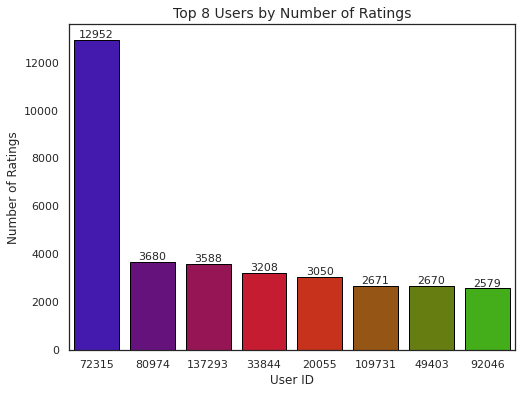

In [15]:
user_ratings_count(train_df,8)

Q: How do users tend to rate movies?

In [20]:
def ratings_distplot(df, column='rating'):
    """
    Plots the distribution of ratings in the dataset.
    Parameters
    ----------
        df (DataFrame): input DataFrame
        column (str): column to plot
    Returns
    -------
        distplot (NoneType): distplot of rating frequencies
    """
    plt.figure(figsize=(8,6))
    ax = sns.distplot(df[f'{column}'],bins=10, kde=False, hist_kws=dict(alpha=0.6),color="#4D17A0")
    mean = df[f'{column}'].mean()
    median = df[f'{column}'].median()
    plt.axvline(x=mean, label = f'mean {round(mean,2)}' , color='#4D17A0', lw=3, ls = '--')
    plt.axvline(x=median, label = f'median {median}' , color='#4DA017', lw=3, ls = '--')
    plt.xlim((0.5,5))
    plt.ylim((0,2500000))
    plt.title(f'Distribution of Ratings', fontsize=14)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

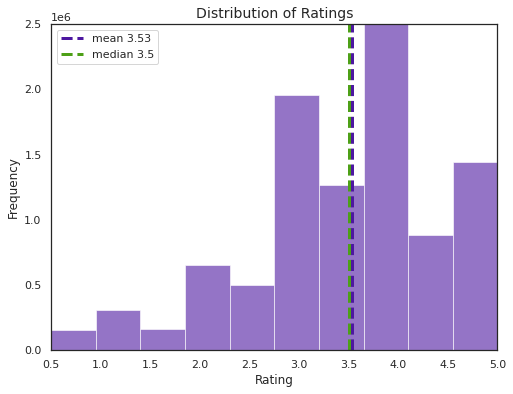

In [21]:
ratings_distplot(eda_df)

# Data Preprocessing

## Merging Datasets

In [5]:
train.duplicated(["movieId","userId", "rating","timestamp"]).sum()

0

In [13]:
# Load the 100k dataset
train.drop('timestamp', axis=1, inplace=True)
train_subset = train[:100000]
reader = Reader(rating_scale=(train_subset['rating'].min(), train_subset['rating'].max()))
data = Dataset.load_from_df(train_subset[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=42)

# Modelling

### Collaborative Filtering

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user [[5]](#ref5).

#### SVD

The Singular Value Decomposition algorithm is a matrix factorization technique which reduces the number of features of a dataset and was popularized by Simon Funk during the [Neflix Prize](https://en.wikipedia.org/wiki/Netflix_Prize) contest [[6]](#ref6). In the matrix structure, each row represents a user and each column represents a movie. The matrix elements are ratings that are given to movies by users.

In [16]:
svd_test = SVD(n_epochs = 30, n_factors = 2000, init_std_dev = 0.05, random_state=42)
svd_test.fit(trainset)
predictions = svd_test.test(testset)
# Calculate RMSE
svd_rmse = accuracy.rmse(predictions)

RMSE: 0.9874


#### NormalPredictor  
The Normal Predictor algorithm predicts a random rating for each movie based on the distribution of the training set, which is assumed to be normal.

In [8]:
np_test = NormalPredictor()
np_test.fit(trainset)
predictions = np_test.test(testset)
# Calculate RMSE
np_rmse = accuracy.rmse(predictions)

RMSE: 1.4732


#### BaselineOnly  
The Baseline Only algorithm predicts the baseline estimate for a given user and movie. A baseline is calculated using either Stochastic Gradient Descent (SGD) or Alternating Least Squares (ALS).

In [9]:
bsl_options = {'method': 'sgd','n_epochs': 40}
blo_test = BaselineOnly(bsl_options=bsl_options)
blo_test.fit(trainset)
predictions = blo_test.test(testset)
# Calculate RMSE
blo_rmse = accuracy.rmse(predictions)

Estimating biases using sgd...
RMSE: 0.9874


#### NMF  
NMF is a collaborative filtering algorithm based on Non-negative Matrix Factorization. The optimization procedure is a (regularized) stochastic gradient descent with a specific choice of step size that ensures non-negativity of factors, provided that their initial values are also positive.

In [8]:
nmf_test = NMF()
nmf_test.fit(trainset)
predictions = nmf_test.test(testset)
# Calculate RMSE
nmf_rmse = accuracy.rmse(predictions)

RMSE: 1.1609


#### SlopeOne  
The SlopeOne algorithm is a simple yet accurate collaborative filtering algorithm that uses a simple linear regression model to solve the data sparisity problem. 

In [9]:
slo_test = SlopeOne()
slo_test.fit(trainset)
predictions = slo_test.test(testset)
# Calculate RMSE
slo_rmse = accuracy.rmse(predictions)

RMSE: 1.1598


#### CoClustering  
The Co-clustering algorithm assigns clusters using a straightforward optimization method, much like k-means.

In [10]:
cc_test = CoClustering(random_state=42)
cc_test.fit(trainset)
predictions = cc_test.test(testset)
# Calculate RMSE
cc_rmse = accuracy.rmse(predictions)

RMSE: 1.1514


In [ ]:
# probalistics matrix factorisation
class PMF(object):
    def _init_(self, num_feat=10, epsilon=1,lamda=0,1,momentum=0.8,maxepoch=20, num_batches=10, batch_size=100000)
    self.num_feat=num_feat
    self._lambda=_lambda
    self.momentum=momentum
    self.maxepoch=maxepoch
    self.num_batches=num_batches
    self.batch_size=batch_size
    
    self.w_Item=None 
    self.w_User=None 
    
    self.rmse_train=[]
    self.rmse_test=[]
    
    def fit (self,trainset,testset):
        self.mean_inv = np.mean(trainset[:,2])
        
        pairs_train = trainset.shape[0]
        pairs_test= testset.shape[0]
        
        num_user= int(max(np.amax(trainset[:,0

    

# Conclusion 

# References